<a href="https://colab.research.google.com/github/Raushan787/Well-Test-Analysis/blob/main/Drawdown_test_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
#Reservoir Parametrs
q=250 #stb/day
Pi=4412 #psi
phie=0.039
u=.8
Bo=1.136 #rbbl/stb
rw=.198 #ft
h=69 #ft
Ct=17*np.power(10,-6.0)
swi=0.24

In [85]:
df=pd.read_excel("Drawdown_test_dataset.xlsx")


#**Basic data visualization**#

In [86]:
df.head()

,t(hrs),Pwf(psi)
0,0.000,4412.0
1,0.010,4400.0
2,0.020,4389.0
3,0.040,4366.0
4,0.075,4333.0


In [87]:
df.tail()

,t(hrs),Pwf(psi)
37,222.0,3481.0
38,266.0,3472.0
39,319.0,3460.0
40,383.0,3446.0
41,460.0,3429.0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   t(hrs)    42 non-null     float64
 1   Pwf(psi)  42 non-null     float64
dtypes: float64(2)
memory usage: 804.0 bytes


In [89]:
df.describe()

,t(hrs),Pwf(psi)
count,42.000000,42.000000
mean,64.927857,3753.583333
std,112.022008,318.300210
min,0.000000,3429.000000
25%,0.625000,3522.250000
50%,7.720000,3596.500000
75%,71.100000,3942.750000
max,460.000000,4412.000000


In [90]:
#Counts of nan value
df.isnull().sum()

,0
t(hrs),0
Pwf(psi),0


In [91]:
#Remane the columns for convenience
df.rename(columns={"t(hrs)":"t","Pwf(psi)":"Pwf"},inplace=True)
df.head()

,t,Pwf
0,0.000,4412.0
1,0.010,4400.0
2,0.020,4389.0
3,0.040,4366.0
4,0.075,4333.0


#**Cartesian Plot**#

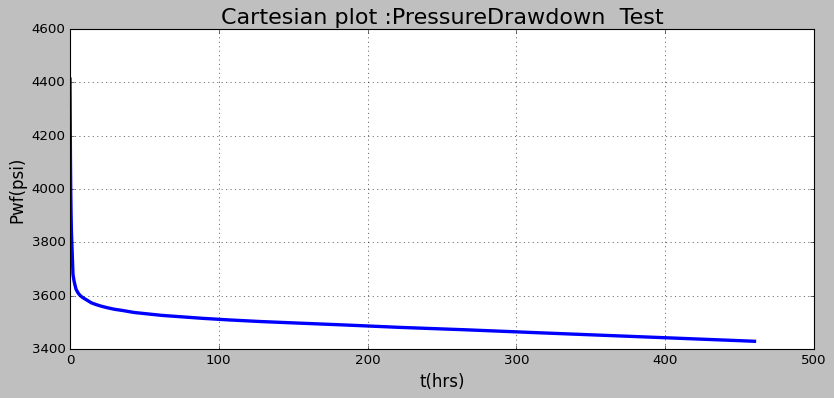

In [92]:
plt.figure(figsize=(12,5))
plt.style.use("classic")
plt.plot(df["t"],df["Pwf"],lw=3)
plt.title("Cartesian plot :PressureDrawdown  Test",fontsize=20)
plt.xlabel("t(hrs)",fontsize=15)
plt.ylabel("Pwf(psi)",fontsize=15)
plt.grid()
plt.show()

#**Semi-log plot**#

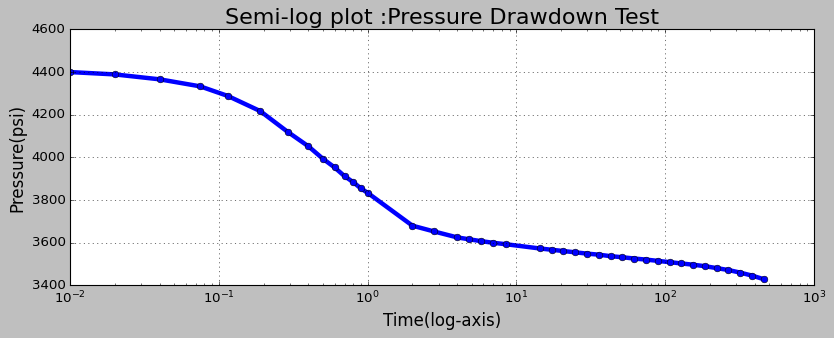

In [93]:
plt.figure(figsize=(12,4))
plt.semilogx(df["t"],df["Pwf"],lw=4,marker="o")
plt.xlabel("Time(log-axis)",fontsize=15)
plt.ylabel("Pressure(psi)",fontsize=15)
plt.title("Semi-log plot :Pressure Drawdown Test",fontsize=20)
plt.grid()
plt.show()

#**Diagnostic Plot**#

In [94]:
df.head()

,t,Pwf
0,0.000,4412.0
1,0.010,4400.0
2,0.020,4389.0
3,0.040,4366.0
4,0.075,4333.0


In [95]:
#Adding delta_P =Pi-Pwf
df["delta_P"]=df["Pwf"][0]-df["Pwf"]

In [96]:
df.head()

,t,Pwf,delta_P
0,0.000,4412.0,0.0
1,0.010,4400.0,12.0
2,0.020,4389.0,23.0
3,0.040,4366.0,46.0
4,0.075,4333.0,79.0


In [97]:
#Adding dp=consecutive difference in delta_P
df["d(delta_P)"]=np.zeros(len(df))
df["d(delta_P)"].iloc[1:]=np.diff(df["delta_P"])
df.head()

<ipython-input-97-f9cc29837840>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["d(delta_P)"].iloc[1:]=np.diff(df["delta_P"])


,t,Pwf,delta_P,d(delta_P)
0,0.000,4412.0,0.0,0.0
1,0.010,4400.0,12.0,12.0
2,0.020,4389.0,23.0,11.0
3,0.040,4366.0,46.0,23.0
4,0.075,4333.0,79.0,33.0


In [98]:
#Adding dt= difference in consecutive t
df["dt"]=np.zeros(len(df))
df["dt"].iloc[1:]=np.diff(df["t"])
df.head()

<ipython-input-98-b1feb296168a>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["dt"].iloc[1:]=np.diff(df["t"])


,t,Pwf,delta_P,d(delta_P),dt
0,0.000,4412.0,0.0,0.0,0.000
1,0.010,4400.0,12.0,12.0,0.010
2,0.020,4389.0,23.0,11.0,0.010
3,0.040,4366.0,46.0,23.0,0.020
4,0.075,4333.0,79.0,33.0,0.035


In [99]:
#Pdash=(dp/dlogt)
#Pdash=(dp/dt)*t
df["Pdash"]=np.zeros(len(df))
df["Pdash"].iloc[1:]=df["t"].iloc[1:]*df["d(delta_P)"].iloc[1:]/df["dt"].iloc[1:]
df.head()

<ipython-input-99-01c96469c308>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Pdash"].iloc[1:]=df["t"].iloc[1:]*df["d(delta_P)"].iloc[1:]/df["dt"].iloc[1:]


,t,Pwf,delta_P,d(delta_P),dt,Pdash
0,0.000,4412.0,0.0,0.0,0.000,0.000000
1,0.010,4400.0,12.0,12.0,0.010,12.000000
2,0.020,4389.0,23.0,11.0,0.010,22.000000
3,0.040,4366.0,46.0,23.0,0.020,46.000000
4,0.075,4333.0,79.0,33.0,0.035,70.714286


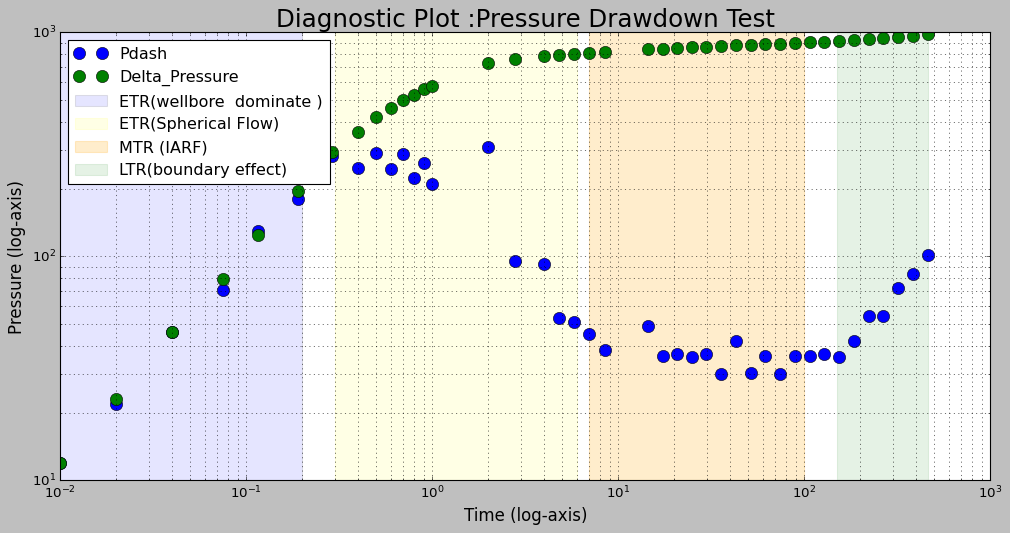

In [100]:
plt.figure(figsize=(15,7))
plt.style.use("classic")

plt.loglog(df["t"],df["Pdash"],"o",label="Pdash",markersize=11)
plt.loglog(df["t"],df["delta_P"],"o",label="Delta_Pressure",markersize=11)
plt.axvspan(0.01,0.2,label="ETR(wellbore  dominate )",alpha=.1)
plt.axvspan(0.3,6,alpha=.1,label="ETR(Spherical Flow)",color="yellow")
plt.axvspan(7,100,alpha=.20,color="orange",label="MTR (IARF)")
plt.axvspan(150,460,alpha=0.1,color="green",label="LTR(boundary effect)")
plt.xlabel("Time (log-axis)",fontsize=15)
plt.ylabel("Pressure (log-axis)",fontsize=15)
plt.title("Diagnostic Plot :Pressure Drawdown Test",fontsize=22)
plt.grid(True,which="both")
plt.legend(loc="best")

*For reference figure is mention below from onepetro*

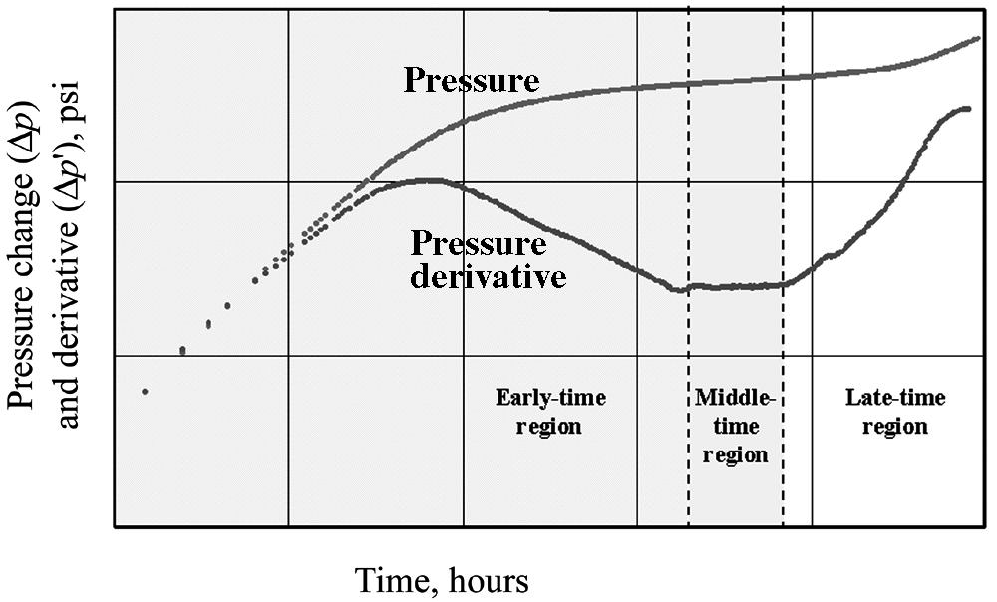

#**Early Time Region**#

In [103]:
#Taking data which lies in ETR for dataframe of ETR region
df_etr=df[(df["t"]>=.01) & (df["t"]<=.2)]
df_etr.head()

,t,Pwf,delta_P,d(delta_P),dt,Pdash
1,0.010,4400.0,12.0,12.0,0.010,12.000000
2,0.020,4389.0,23.0,11.0,0.010,22.000000
3,0.040,4366.0,46.0,23.0,0.020,46.000000
4,0.075,4333.0,79.0,33.0,0.035,70.714286
5,0.115,4288.0,124.0,45.0,0.040,129.375000


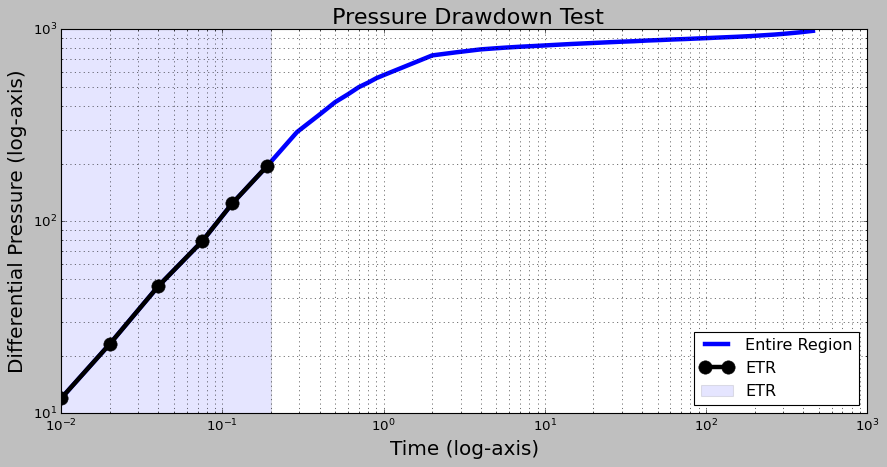

In [104]:
plt.figure(figsize=(13,6))
plt.loglog(df["t"],df["delta_P"],label="Entire Region",color="blue",lw=4)
plt.loglog(df_etr["t"],df_etr["delta_P"],label="ETR",color="black",lw=4,markersize=12,marker="o")
plt.axvspan(0.01,.2,alpha=.1,label="ETR")
plt.title(" Pressure Drawdown Test",fontsize=20)
plt.xlabel("Time (log-axis)",fontsize=18)
plt.ylabel("Differential Pressure (log-axis)",fontsize=18)
plt.grid(True,which="both")
plt.legend(loc="best")

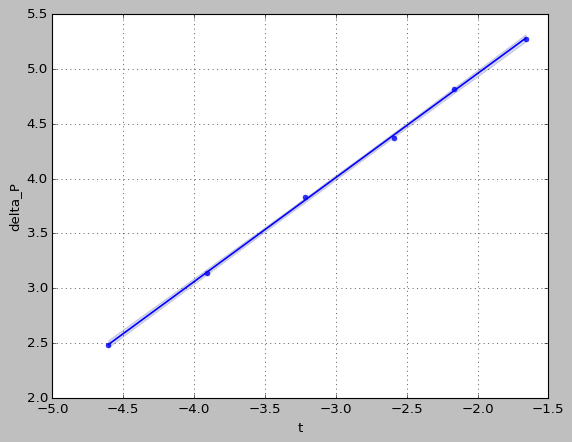

In [105]:
#Regression plot
sns.regplot(x=np.log(df_etr[["t"]]),y=np.log(df_etr["delta_P"]),marker="o")
plt.grid()

**Using LinearRegression**

In [106]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
x=np.log10(df_etr[["t"]])
y=np.log10(df_etr["delta_P"])
model.fit(x,y)

LinearRegression()

In [107]:
model.coef_[0]

np.float64(0.9482922351730115)

since slope is .95 its near to 1

In [108]:
model.intercept_

np.float64(2.976594410596821)

In [109]:
#Since R-square is .999 show best fit the line
model.score(x,y)

0.9996461489464138

**Wellbore Storage Coefficient**

**C=qBo/((delta_P/delta_T)*24)**

In [110]:
C=q*Bo/((df_etr["delta_P"][3]/df_etr["t"][3])*24)
C

np.float64(0.010289855072463768)

In [111]:
print("The wellbore storage coefficent is: ",np.round(C,4)  ,"rbbl/psi")

The wellbore storage coefficent is:  0.0103 rbbl/psi


#**MTR (Infinite Acting Radial Flow)**


In [112]:
#Creating the dataframe of MTR
df_iarf=df[(df["t"]>=7) & (df["t"]<=100)]
df_iarf.head()

,t,Pwf,delta_P,d(delta_P),dt,Pdash
21,8.5,3593.0,819.0,7.0,1.56,38.141026
22,14.4,3573.0,839.0,20.0,5.90,48.813559
23,17.3,3567.0,845.0,6.0,2.90,35.793103
24,20.7,3561.0,851.0,6.0,3.40,36.529412
25,24.9,3555.0,857.0,6.0,4.20,35.571429


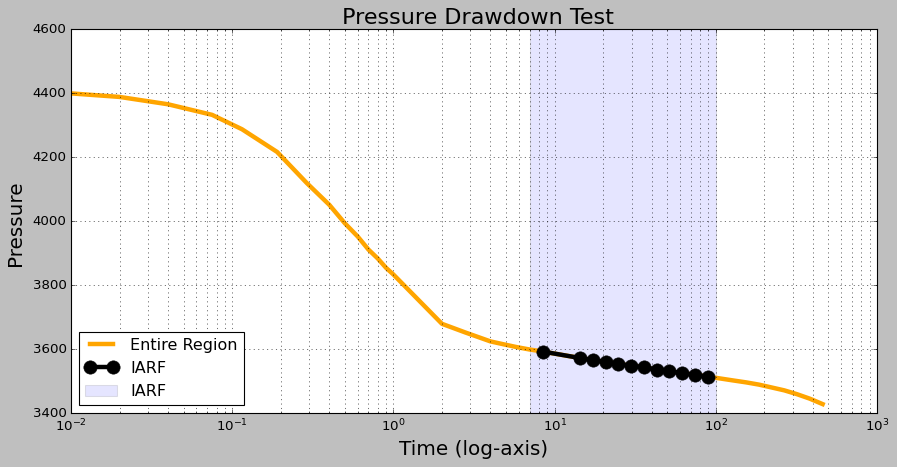

In [113]:
plt.figure(figsize=(13,6))
plt.semilogx(df["t"],df["Pwf"],label="Entire Region",color="orange",lw=4)
plt.semilogx(df_iarf["t"],df_iarf["Pwf"],label="IARF",color="black",lw=4,markersize=12,marker="o")
plt.axvspan(7,100,alpha=.1,label="IARF")
plt.title(" Pressure Drawdown Test",fontsize=20)
plt.xlabel("Time (log-axis)",fontsize=18)
plt.ylabel("Pressure ",fontsize=18)
plt.grid(True,which="both")
plt.legend(loc="best")

In [114]:
x=np.log10(df_iarf[["t"]])
y=df_iarf["Pwf"]
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [115]:
model.coef_

array([-75.19517374])

In [116]:
model.intercept_

np.float64(3660.6846430881)

Equation of line is **Pwf=3660-75*log(t)**

In [117]:
Pwf_1hr=3660-75*np.log(1)
Pwf_1hr

np.float64(3660.0)

In [118]:
#Slope of straight line
m=np.abs(model.coef_[0])
m

np.float64(75.1951737437346)

Permeability

**k=162.6*q*u*Bo/m*h**

In [119]:
k=162.6*q*u*Bo/(m*h)
k

np.float64(7.120160942178092)

In [120]:
print("The permeability of reservoir is :",np.round(k,3),"mD")

The permeability of reservoir is : 7.12 mD


**Skin**

**s=1.151*{((Pi-Pwf_1hr)/m)+3.23-log((k/phie X u X ct X rw^2))}**

In [121]:
s=1.151*((Pi-Pwf_1hr)/m +3.23-np.log10((k)/(phie*u*Ct*rw*rw)))
s

np.float64(5.405194889415939)

In [122]:
print("The skin factor is : ", np.round(s,3))

The skin factor is :  5.405


In [123]:
print("The pressure loss due to skin factor is :",np.round(0.87*m*s,3), "psi")

The pressure loss due to skin factor is : 353.607 psi


#**LTR (Pseudo-Steady-State)**#

In [124]:
#Taking dataframe of LTR
df_ltr=df[(df["t"]>=200) & (df["t"]<=460)]
df_ltr.head()

,t,Pwf,delta_P,d(delta_P),dt,Pdash
37,222.0,3481.0,931.0,9.0,37.0,54.000000
38,266.0,3472.0,940.0,9.0,44.0,54.409091
39,319.0,3460.0,952.0,12.0,53.0,72.226415
40,383.0,3446.0,966.0,14.0,64.0,83.781250
41,460.0,3429.0,983.0,17.0,77.0,101.558442


In [125]:
x=df_ltr[["t"]]
y=df_ltr["Pwf"]



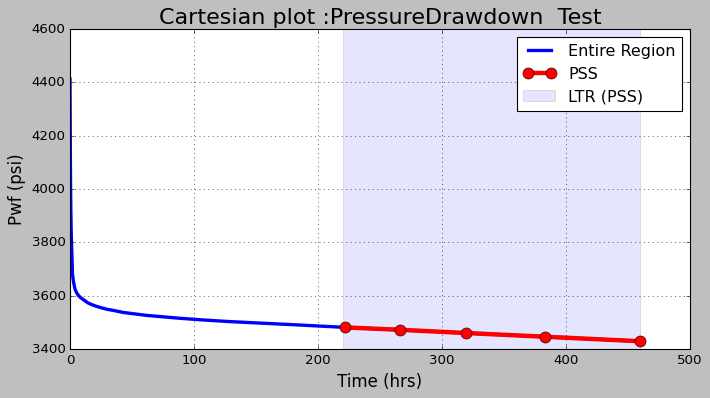

In [126]:

plt.figure(figsize=(10,5))
plt.style.use("classic")
plt.plot(df["t"],df["Pwf"],lw=3,label="Entire Region")
plt.plot(x,y,marker="o",label="PSS",lw=4,markersize=10,color="red")
plt.axvspan(220,460,alpha=.1,label="LTR (PSS)")
plt.title("Cartesian plot :PressureDrawdown  Test",fontsize=20)
plt.xlabel("Time (hrs)",fontsize=15)
plt.ylabel("Pwf (psi)",fontsize=15)
plt.legend()
plt.grid()
plt.show()

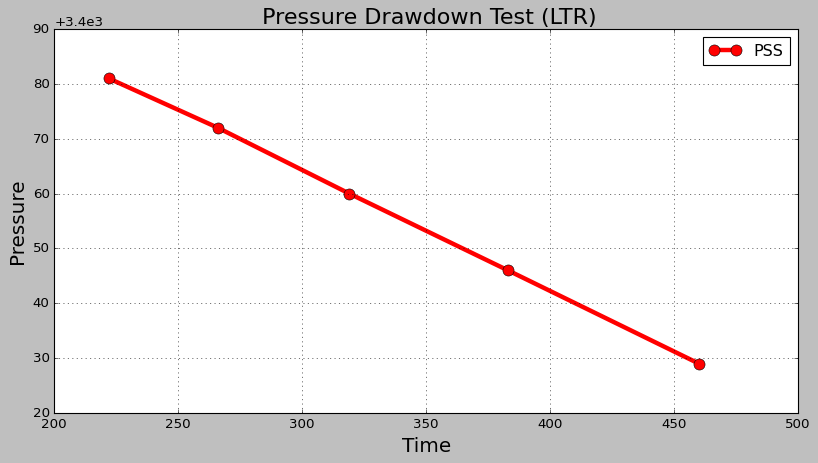

In [127]:
plt.figure(figsize=(12,6))
plt.plot(x,y,marker="o",label="PSS",lw=4,markersize=10,color="red")
plt.title(" Pressure Drawdown Test (LTR)",fontsize=20)
plt.xlabel("Time",fontsize=18)
plt.ylabel("Pressure",fontsize=18)
plt.grid()
plt.legend()

In [128]:
model.fit(x,y)

LinearRegression()

In [129]:
model.coef_

array([-0.21938747])

In [130]:
model.intercept_

np.float64(3529.997864568699)

In [131]:
#Slope
m_ltr=model.coef_[0]
m_ltr

np.float64(-0.21938746838999715)

**Drainage area**

**A=-.2339*qBo/Ct*m_ltr**

In [132]:
A=-.2339*q*Bo/(phie*h*Ct*m_ltr)
A

np.float64(6618721.784407974)

In [133]:
A_acre=A/43560
A_acre

np.float64(151.9449445456376)

In [134]:
print("The drainage area of reservoir is ",np.round(A_acre,3)," acre and ", np.round(A,3),"sq.ft" )

The drainage area of reservoir is  151.945  acre and  6618721.784 sq.ft


In [135]:
Volume=A*h*phie
print("The volume of reservoir is ",np.round(Volume,3),"ft^2")

The volume of reservoir is  17810980.322 ft^2


In [136]:
#Initial Oil in Place
N=Volume*(1-swi)/(5.615*Bo)
print("The initial oil in place is :",np.round(N,3)  ,"stb")

The initial oil in place is : 2122136.544 stb


#**Conclusion**#

# The formation permeability is of only 7.12 md which indicates that the well has poor permeability. The skin factor obtained is positive that means the Zone nearest to the wellbore is likely to be damaged. Since, the skin is positive, there is an additional pressure drop of 353.61psia. The well is damaged and a good candidate for stimulation.